In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
df=pd.read_csv("C:/Users/USER/OneDrive/Masaüstü/Denemeler/flower-classification/Iris.csv")

In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\

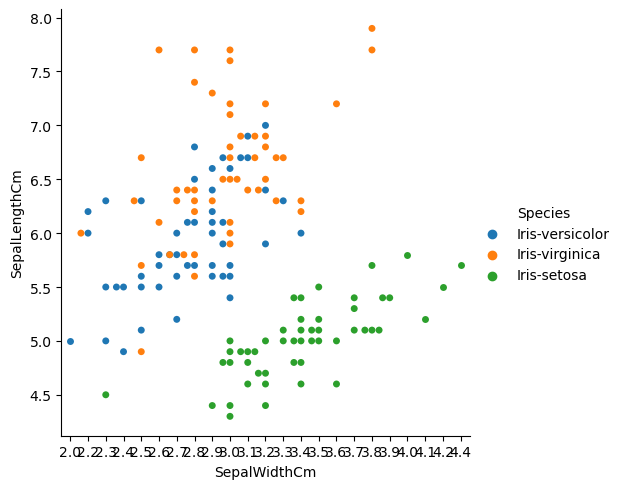

In [39]:
sns.catplot(data=df, kind="swarm", x="SepalWidthCm", y="SepalLengthCm", hue="Species", size=5)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\

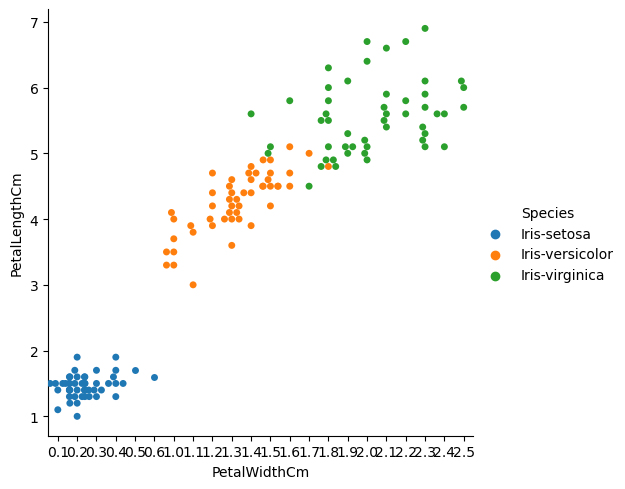

In [40]:
sns.catplot(data=df, kind="swarm", x="PetalWidthCm", y="PetalLengthCm", hue="Species", size=5)

## Preparing the test and train data

In [41]:
object_cols=df.select_dtypes(include=["object"]).columns
for col in object_cols:
    df[col]=pd.factorize(df[col])[0]+1

In [42]:
X=df.drop(["Species"], axis=1)
y=df["Species"]

In [43]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2)

## Modelling

In [65]:
models={
    "SGD Classifier":SGDClassifier(),
    "Random Forest Classifier":RandomForestClassifier()
}

In [87]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        model_scores[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }

    return model_scores

In [84]:
model_scores

{'SGD Classifier': {'Accuracy': 0.475,
  'Precision': 0.47241666666666665,
  'Recall': 0.475,
  'F1 Score': 0.39405823967867765},
 'Random Forest Classifier': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0}}

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


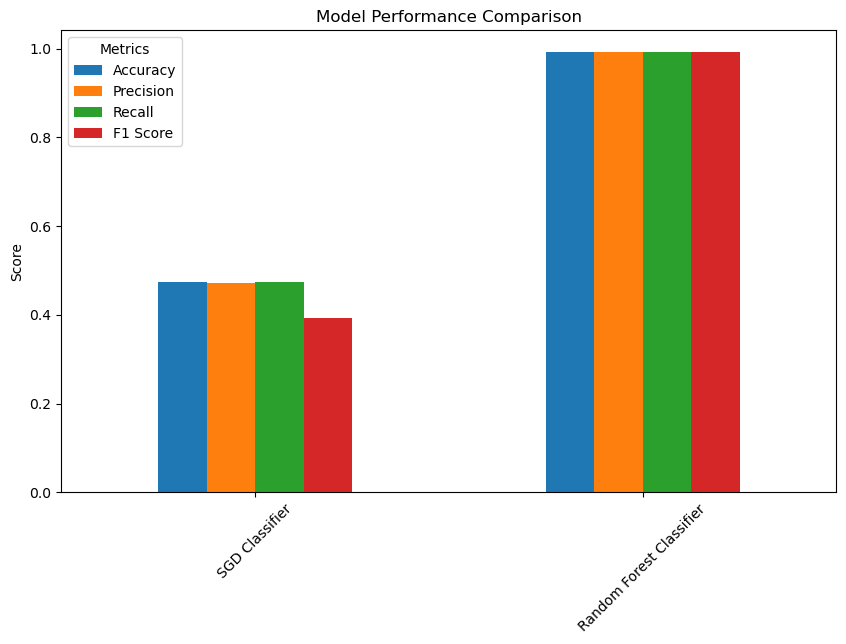

In [86]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

if all(isinstance(v, (int, float)) for v in model_scores.values()):
    model_compare = pd.DataFrame(model_scores, index=["Accuracy"]).T
else:
    model_compare = pd.DataFrame(model_scores).T 

model_compare.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()